In [8]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")
from leitmotifs.plotting import *

import seaborn as sns
from leitmotifs.lama import *

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

def normalize(x) :
    std = np.std(x)
    mean = np.mean(x)
    if std == 0:
        return x - mean
    return (x - mean) / std

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
df = pd.read_csv("../datasets/climate_history/Canadian_climate_history.csv").set_index("LOCAL_DATE")
df.index = pd.to_datetime(df.index)

df = df.fillna(method="bfill").fillna(method="ffill").iloc[20000:, :30]
# df_apply

In [15]:
df.T.shape

(26, 9221)

(26, 9221)


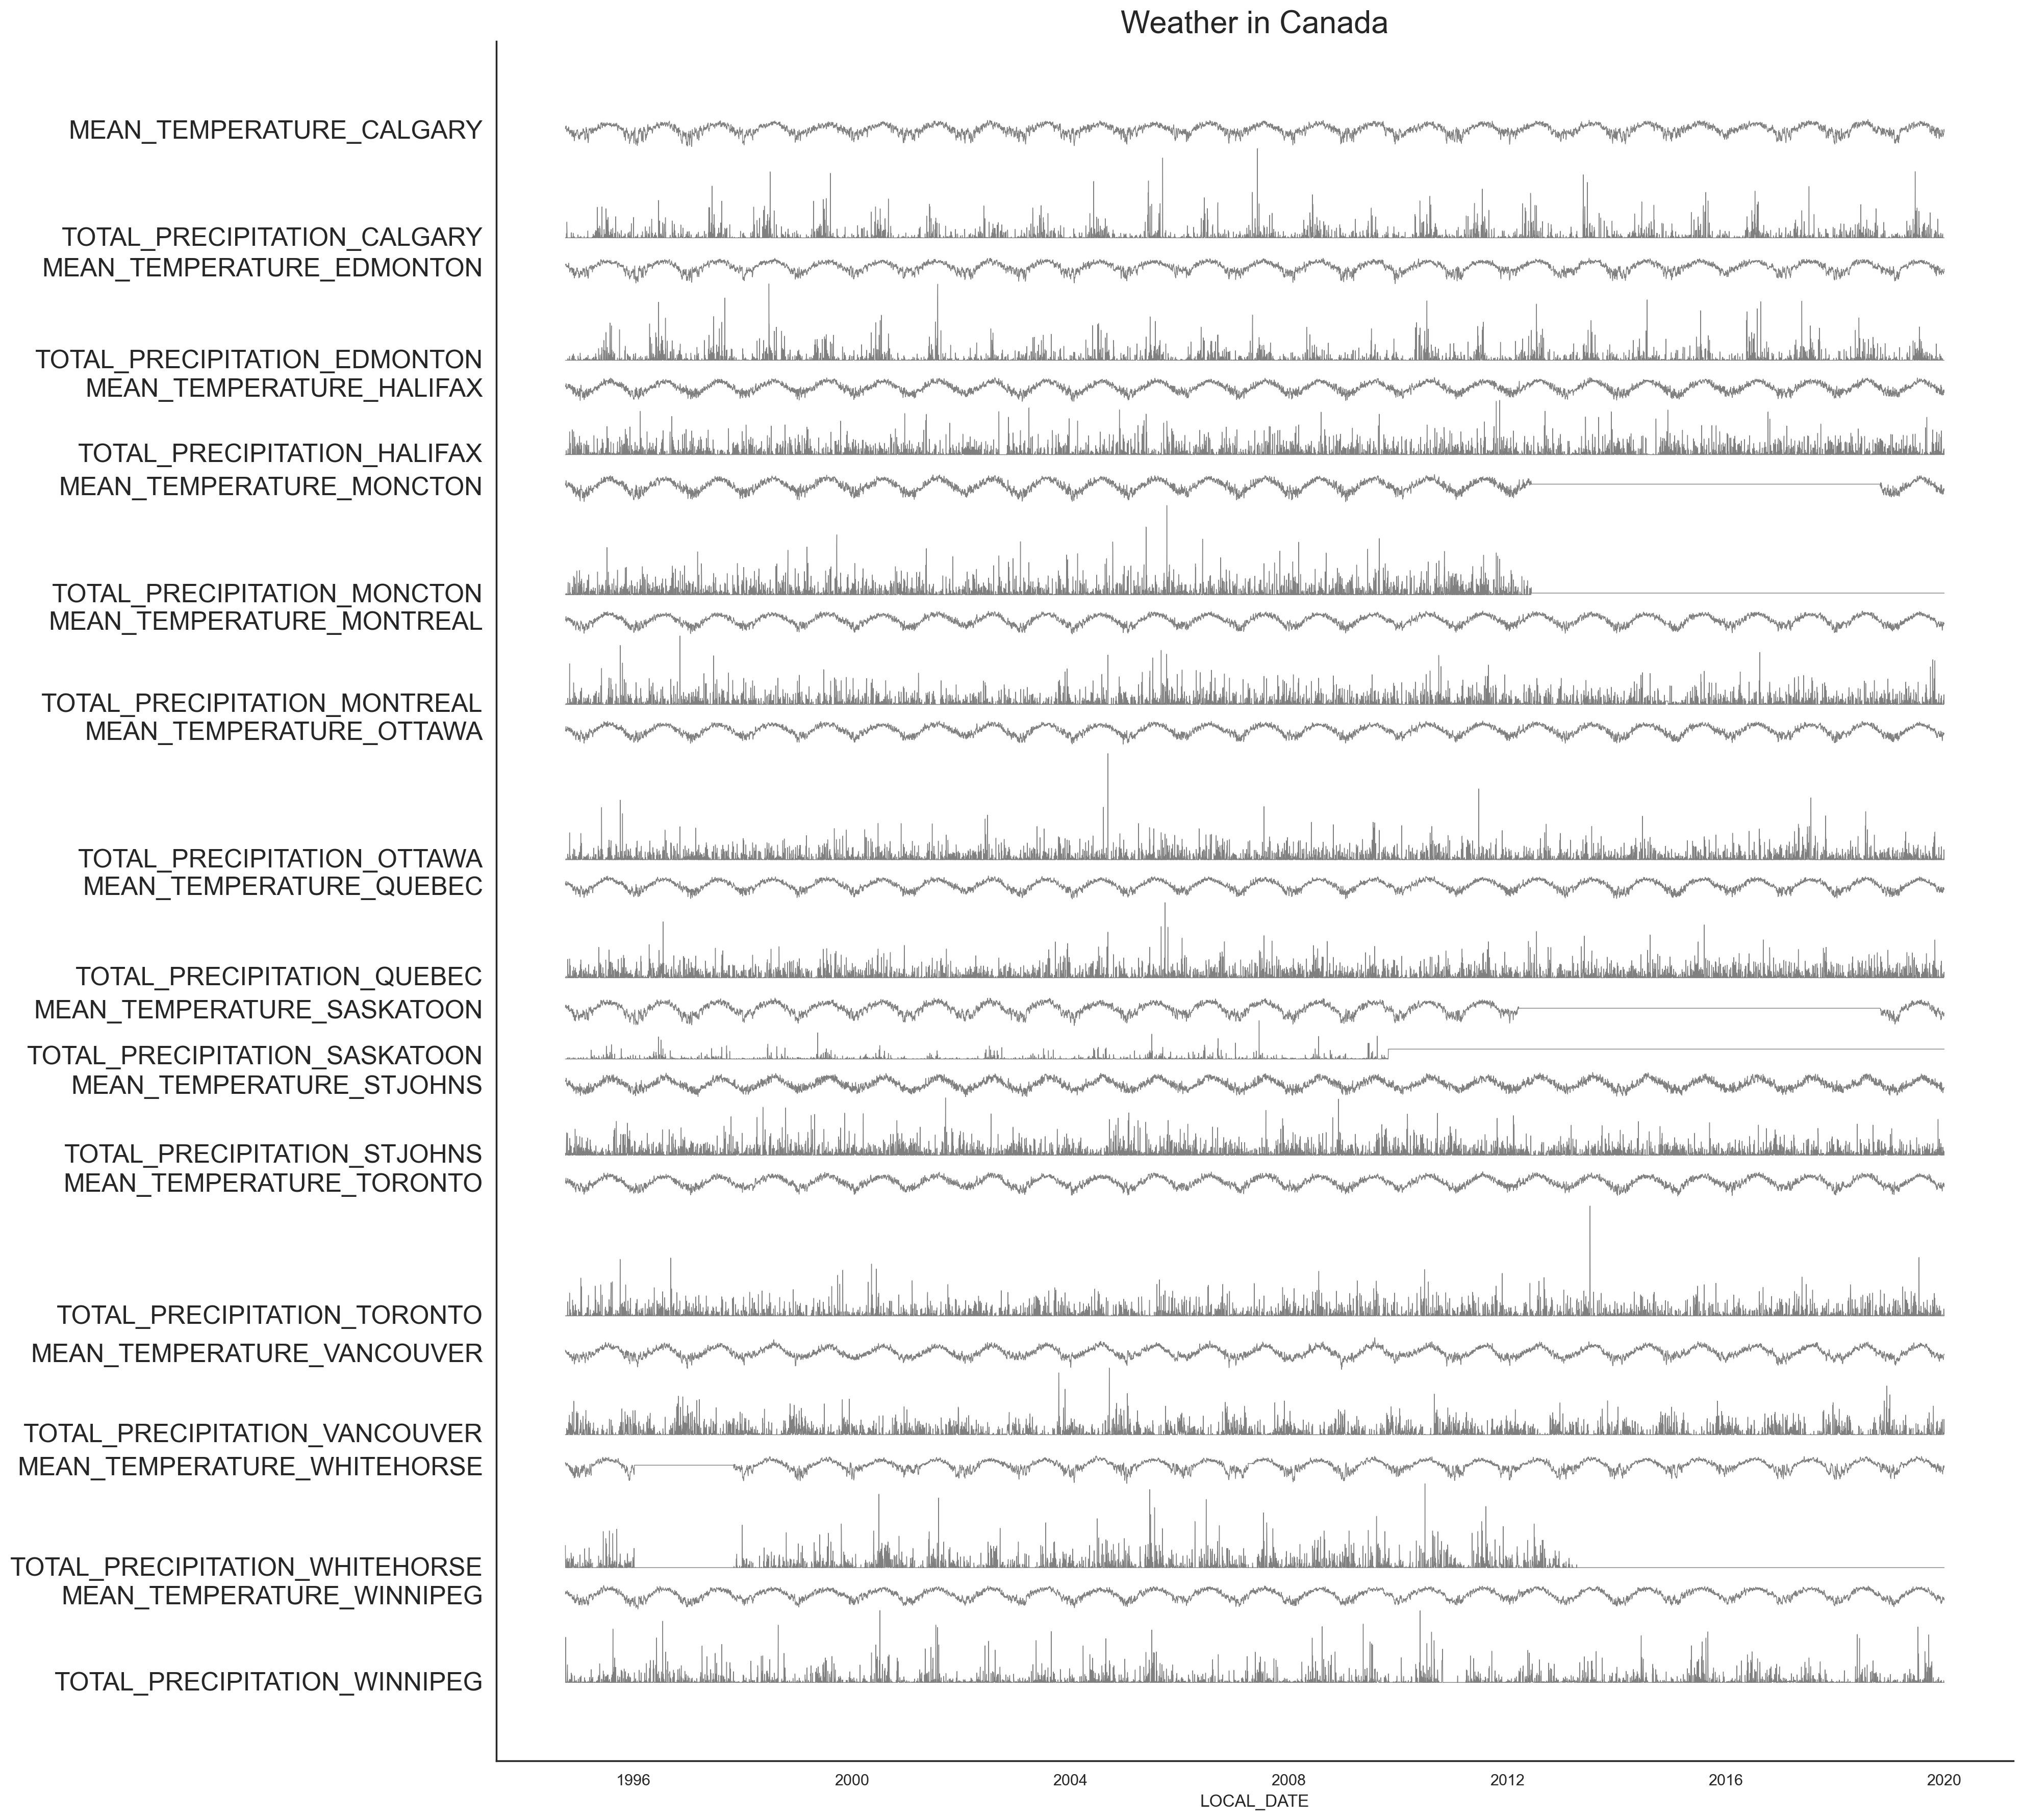

'\n_ = ml.fit_motif_length(\n    k_max,\n    motif_length_range,\n    plot=True,\n    plot_elbows=False,\n    plot_motifsets=True,\n    plot_best_only=True\n)    \n'

In [16]:
# Input Parameters
f = 2         # number of sub-dimensions
ds_name = "Weather in Canada"
series = df.T

print(series.shape)
# initialize LAMA
ml = LAMA(
    ds_name,  
    series,
    # ground_truth=df_gt,
    dimension_labels=df.index,
    n_dims=f,   # number of sub-dimensions
    n_jobs=8    # number of parallel jobs
)

ml.plot_dataset()

"""
_ = ml.fit_motif_length(
    k_max,
    motif_length_range,
    plot=True,
    plot_elbows=False,
    plot_motifsets=True,
    plot_best_only=True
)    
"""

Data (26, 9221)
Using Default Backend


Compute ks (10):   0%|          | 0/9 [00:00<?, ?it/s]

Chosen window-size: 360 in 15.4 s
Elbow Points [7]


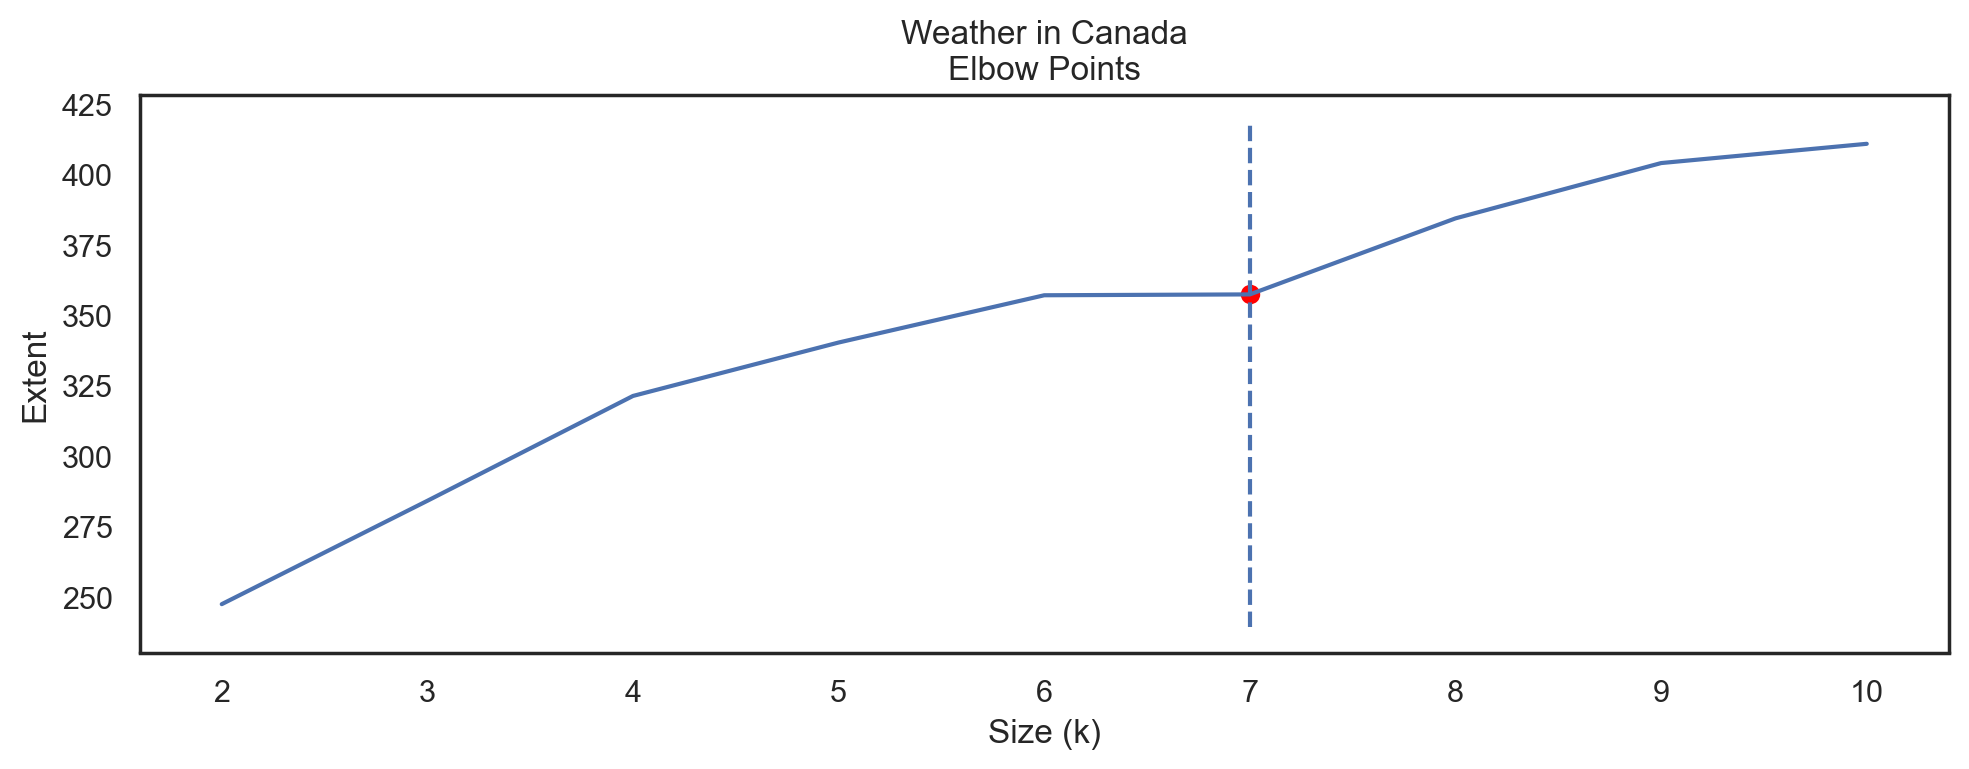

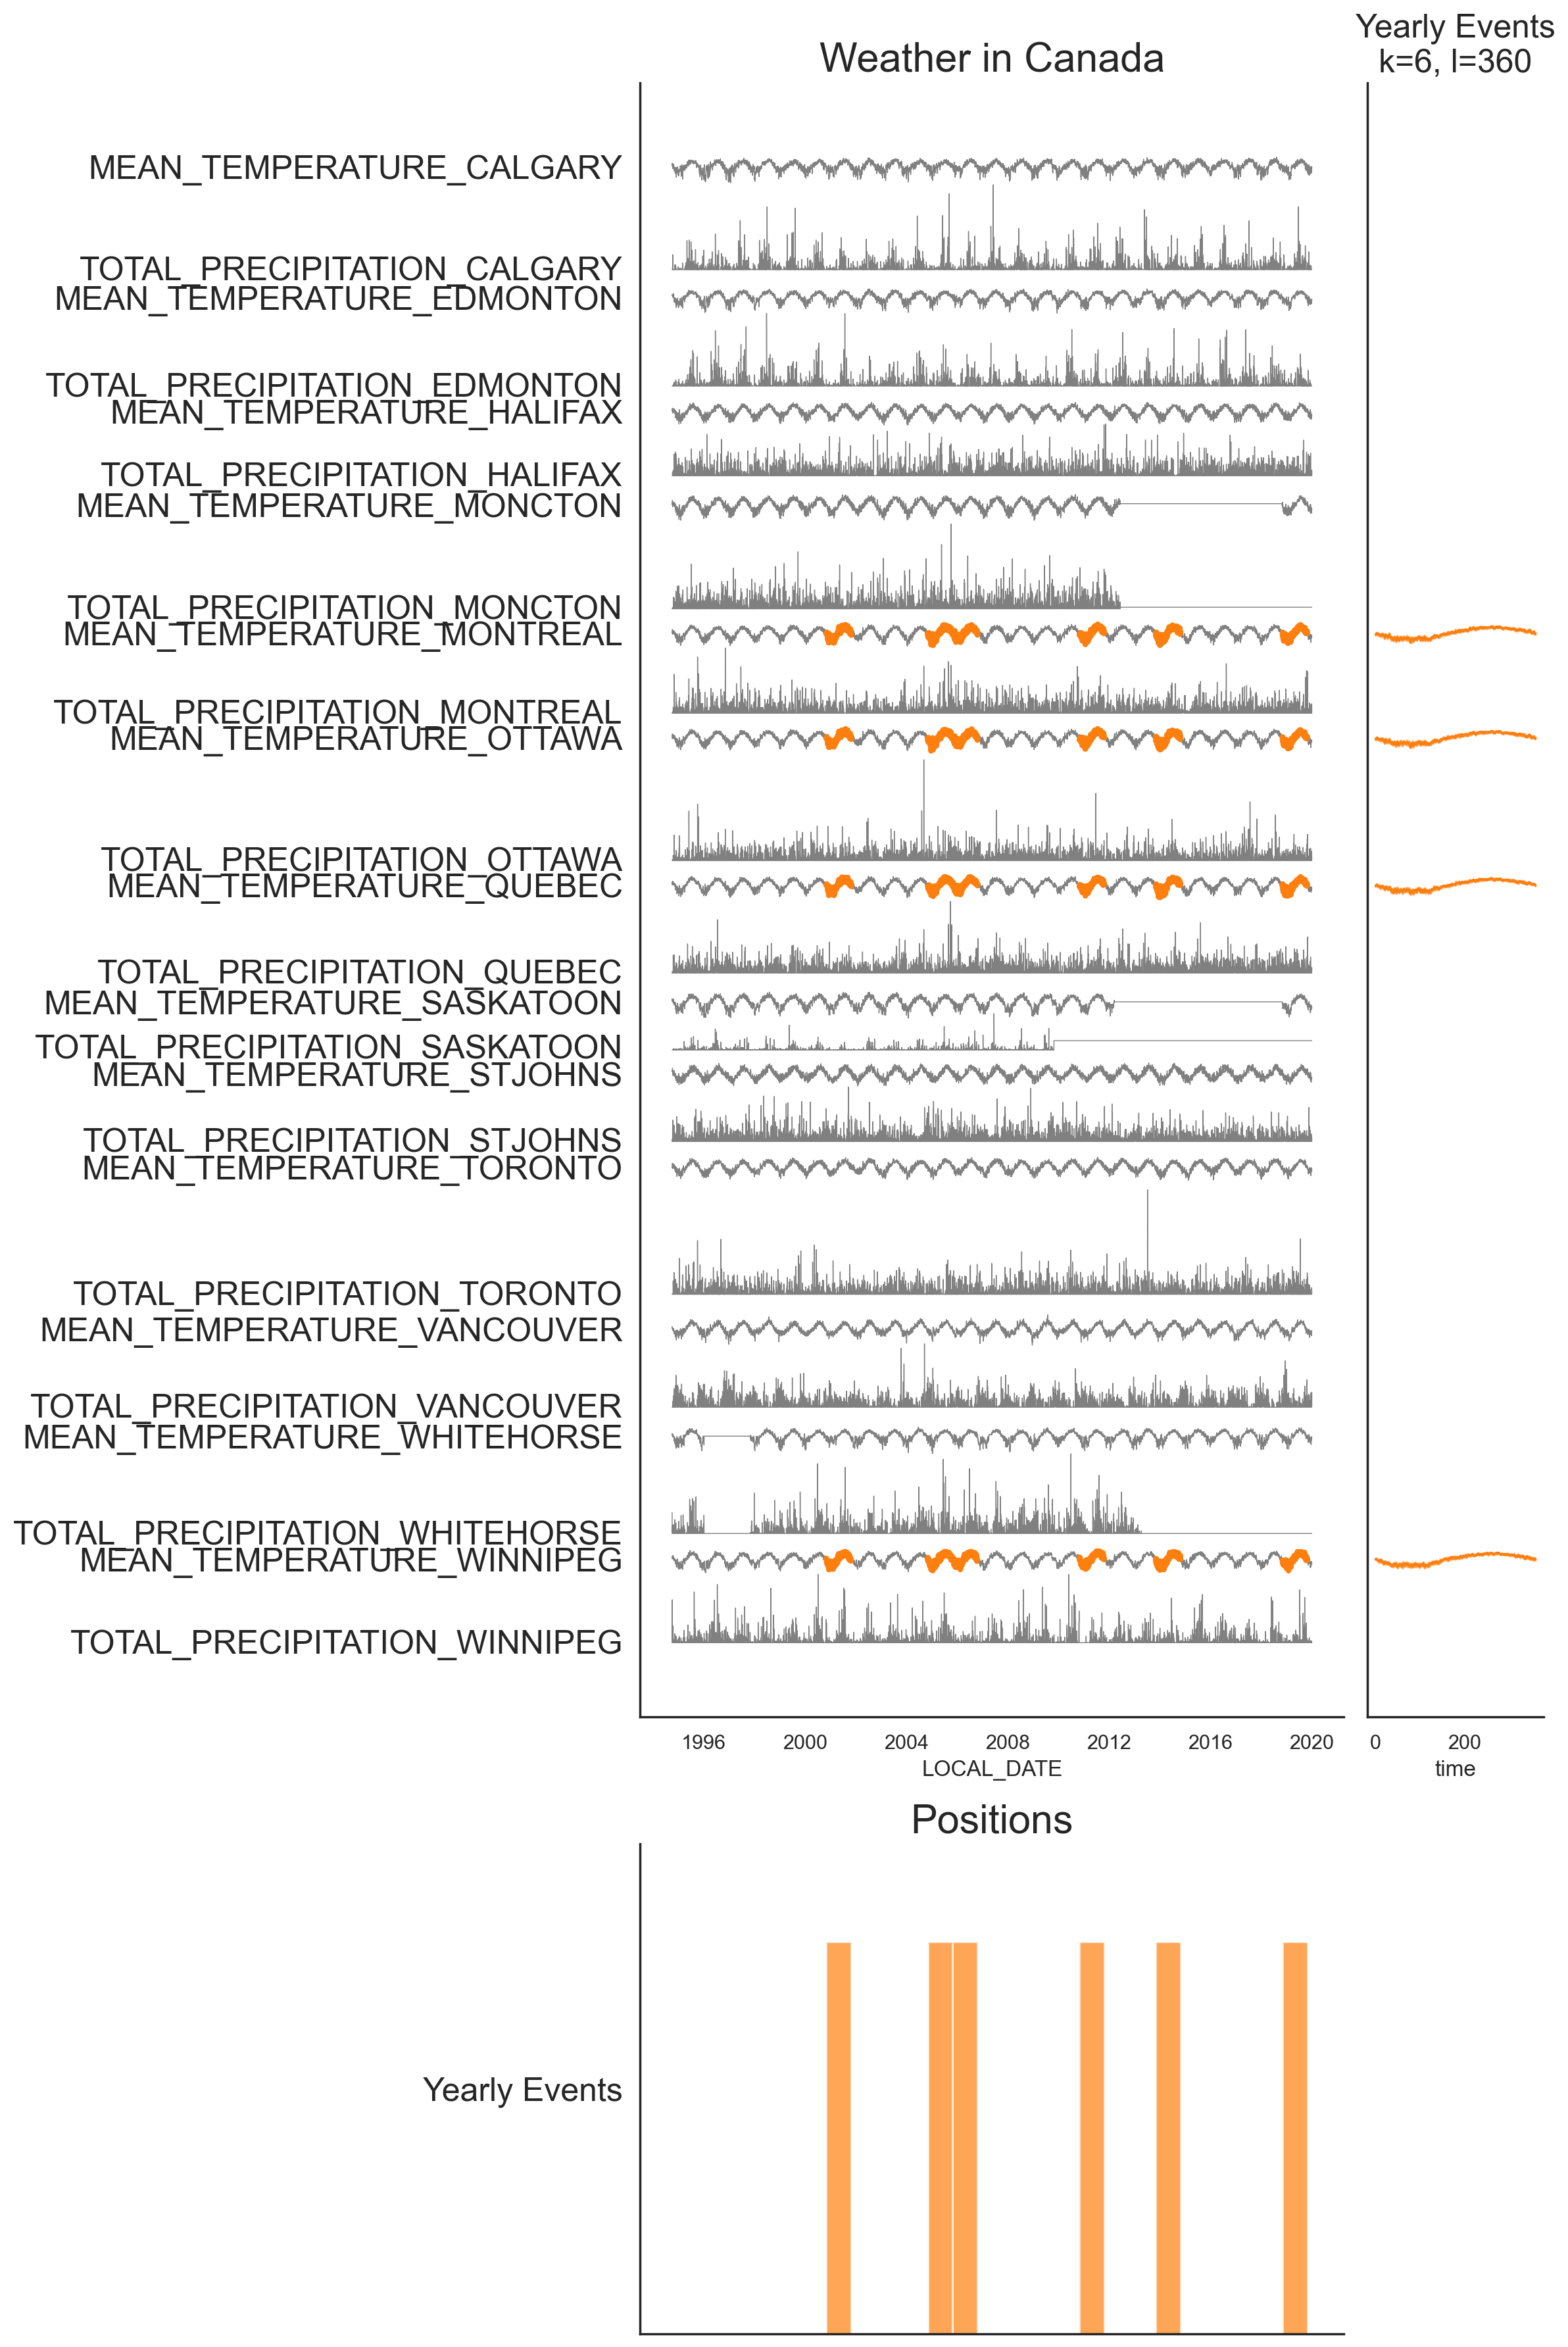

(<Figure size 1200x1800 with 3 Axes>,
 array([[<Axes: title={'center': 'Weather in Canada'}, xlabel='LOCAL_DATE'>,
         <Axes: title={'center': 'Yearly Events\nk=6, l=360'}, xlabel='time', ylabel='value'>],
        [<Axes: title={'center': 'Positions'}>, <Axes: >]], dtype=object))

In [17]:
f = 4         # number of sub-dimensions
k_max = 10     # expected number of repeats
ds_name = "Weather in Canada"
series = df.T

# initialize LAMA
ml = LAMA(
    ds_name,  
    series,
    # ground_truth=df_gt,
    dimension_labels=df.index,
    n_dims=f,   # number of sub-dimensions
    n_jobs=8    # number of parallel jobs
)

dists, motif_sets, elbow_points = ml.fit_k_elbow(
    k_max=k_max,
    motif_length=360,
    plot_elbows=True,
    plot_motifsets=False,
)

ml.elbow_points = [6]
ml.plot_motifset(motifset_name="Yearly Events")